# Harish Practise : Sales Prediction Using Logistic Regression

In [1]:
import pandas as pd 
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [44]:
df = pd.read_csv('DigitalAd_dataset.csv')
df.head()

,Age,Salary,Status
0,18,82000,0
1,29,80000,0
2,47,25000,1
3,45,26000,1
4,46,28000,1


In [7]:
df.shape

(400, 3)

# Feature and target

In [10]:
X = df[['Age', 'Salary']]
y = df[['Status']]
X

,Age,Salary
0,18,82000
1,29,80000
2,47,25000
3,45,26000
4,46,28000
...,...,...
395,35,65000
396,26,80000
397,26,52000
398,20,86000


In [4]:
y

,Status
0,0
1,0
2,1
3,1
4,1
...,...
395,0
396,0
397,0
398,0


# Train Test Split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# Feature Scaling

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model

In [29]:
model = LogisticRegression()
model.fit(X_train_scaled,y_train)
model.score(X_test_scaled,y_test)

C:\Users\91829\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.82

In [36]:
y_pred = model.predict(X_test_scaled)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

# Predicting either a customer is going to buy or not

In [40]:
age = int(input('Enter Customer Age :'))
sal = int(input('Enter Customer Salary :'))
cus = [[age, sal]]
result = model.predict(scaler.transform(cus))
print(result)
if result == 1:
          print('Customer is going to Buy')
else:
          print('Customer is not going to Buy')

Enter Customer Age :18
Enter Customer Salary :82000
[0]
Customer is not going to Buy


C:\Users\91829\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Classification Report

In [31]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.96      0.88        68
           1       0.85      0.53      0.65        32

    accuracy                           0.82       100
   macro avg       0.83      0.74      0.77       100
weighted avg       0.82      0.82      0.81       100



# Evaluation

In [35]:
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 82.0

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.96      0.88        68
           1       0.85      0.53      0.65        32

    accuracy                           0.82       100
   macro avg       0.83      0.74      0.77       100
weighted avg       0.82      0.82      0.81       100



# Confusion Matrix

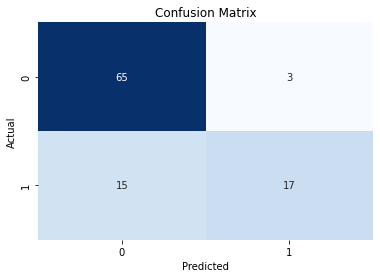

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()